In [ ]:
!pip -q install langchain tiktoken chromadb pypdf transformers InstructorEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.4/502.4 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.6/277.6 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.2/178.2 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip show langchain

Name: langchain
Version: 0.0.346
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, anyio, async-timeout, dataclasses-json, jsonpatch, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


## QA Retrieval No Open AI - Fastchat-T5

In [ ]:
!pip install faiss-cpu

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from langchain.vectorstores.faiss import FAISS
# Load the pre-trained GPT-2 model and tokenizer
model_name = "gpt2"  # You can adjust the model based on your requirements
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader
doc_reader = PdfReader('/content/spiritual-laws-of-success.pdf')

In [ ]:
# read data from the file and put them into a variable called raw_text
raw_text = ''
for i, page in enumerate(doc_reader.pages):

    text = page.extract_text()

    if text:

        raw_text += text

In [ ]:
print(f"The book has {len(raw_text)} letters")

The book has 93961 letters


In [ ]:
print(raw_text[:70])

Deepak	Chopra
The	Seven
spiritual
laws
of
Success
Contents
Acknowledgm


In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 1000,
    chunk_overlap  = 200, #striding over the text
    length_function = len,
)
texts = text_splitter.split_text(raw_text)

In [ ]:
print(f"We have {len(texts)} Chunks")

We have 118 Chunks


In [ ]:
print(texts[20])

power.	And	when	you	squeeze	the	gap,	you	squeeze	your	connection	to	the	field
of	pure	potentiality	and	infinite	creativity.
There	is	a	prayer	in	A	Course	in	Miracles	that	states,	Today	I	shall	judge	nothing
that	occurs.	Non-judgment	creates	silence	in	your	mind.	It	is	a	good	idea,
therefore,	to	begin	your	day	with	that	statement.	And	throughout	the	day,	remind
yourself	of	that	statement	each	time	you	catch	yourself	judging.	If	practicing	this
procedure	for	the	whole	day	seems	too	difficult,	then	you	may	simply	say	to
yourself,	For	the	next	two	hours,	I	wont	judge	anything,	or	For	the	next	hour,	I
will	experience	non-judgment.	Then	you	can	extend	it	gradually.	Through
silence,	through	meditation,	and	through	non-judgment,	you	will	access	the	first
law,	the	Law	of	Pure	Potentiality.	Once	you	start	doing	that,	you	can	add	a	fourth
component	to	this	practice,	and	that	is	regularly	spending	time	in	direct
communion	with	nature.	Spending	time	in	nature	enables	you	to	sense	the


In [ ]:
input_text = "What is the capital of England?"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

output = model.generate(input_ids, max_length=50, do_sample=True)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What is the capital of England? Is it of the king, of the king's friends, or of his house?" And this is, "But for my part they are my sons; for I was made to obey you, and I will do


In [ ]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 38.3 MB/s eta 0:00:00


In [ ]:
from langchain.vectorstores.faiss import FAISS
import fitz
def pdf_to_text(pdf_path):
    """
    Convert a PDF file to text using PyMuPDF.
    """
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text
def document_interaction(prompt, pdf_path, max_tokens=1024):
    # Convert PDF document to text
    document_text = pdf_to_text(pdf_path)

    # Tokenize the document
    document_tokens = tokenizer.encode(document_text, return_tensors="pt")

    # Tokenize the prompt
    prompt_tokens = tokenizer.encode(prompt, return_tensors="pt")

    # Truncate input if it exceeds the maximum tokens
    total_tokens = prompt_tokens.size(1) + document_tokens.size(1)
    if total_tokens > max_tokens:
        excess_tokens = total_tokens - max_tokens
        document_tokens = document_tokens[:, excess_tokens:]

    # Concatenate the prompt and truncated document tokens along the sequence dimension
    input_tokens = torch.cat([prompt_tokens, document_tokens], dim=-1)

    # Generate response from the model
    output = model.generate(input_tokens, max_length=1025, num_beams=5, no_repeat_ngram_size=2, pad_token_id=model.config.eos_token_id)

    # Decode the generated output
    response = tokenizer.decode(output[0], skip_special_tokens=True)

    return response.strip()

# Example usage
prompt_example = "who are the authors of the book?"
pdf_path_example = "/content/spiritual-laws-of-success.pdf" # Replace with the path to your PDF document

# Interaction with GPT-2 using PDF document
response_example = document_interaction(prompt_example, pdf_path_example)

# Display the response
print("GPT-2 Response:")
print(response_example)

GPT-2 Response:
who are the authors of the book? promote
health and well-being. His books have been translated into more than twenty-
five languages and he lectures widely throughout North America, South
America, India, Europe, Japan, and Australia. Currently he is the Executive
Director of the Chopra Center for Well-Being in La Jolla, California.
BOOKS:
Creating Affluence (Amber-Alien / New World Library)
The Way of the Wizard (Crown / Harmony)
Ageless Body, Timeless Mind (Crown / Harmony)
Journey Into Healing (Crown / Harmony)
Restful Sleep (Crown / Harmony)
Perfect Weight (Crown / Harmony)
Perfect Health (Crown / Harmony)
Perfect Digestion (Crown / Harmony)
Unconditional Life (Bantam)
Quantum Healing (Bantam)
Creating Health (Houghton Mifflin)
Return of the Rishi (Houghton Mifflin)
audio cassettes:
The Seven Spiritual Laws of Success
Creating Affluence
The Crescent Moon: Prose Poems of Rabindranath Tagore
Escaping the Prison of the Intellect
Sacred Verses, Healing Sounds, Volume I:


In [ ]:
prompt_example = "What are the seven spiritual laws of success?"
# Interaction with GPT-2 using PDF document
response_example = document_interaction(prompt_example, pdf_path_example)

# Display the response
print("GPT-2 Response:")
print(response_example)


GPT-2 Response:
What are the seven spiritual laws of success?
health and well-being. His books have been translated into more than twenty-
five languages and he lectures widely throughout North America, South
America, India, Europe, Japan, and Australia. Currently he is the Executive
Director of the Chopra Center for Well-Being in La Jolla, California.
BOOKS:
Creating Affluence (Amber-Alien / New World Library)
The Way of the Wizard (Crown / Harmony)
Ageless Body, Timeless Mind (Crown / Harmony)
Journey Into Healing (Crown / Harmony)
Restful Sleep (Crown / Harmony)
Perfect Weight (Crown / Harmony)
Perfect Health (Crown / Harmony)
Perfect Digestion (Crown / Harmony)
Unconditional Life (Bantam)
Quantum Healing (Bantam)
Creating Health (Houghton Mifflin)
Return of the Rishi (Houghton Mifflin)
audio cassettes:
The Seven Spiritual Laws of Success
Creating Affluence
The Crescent Moon: Prose Poems of Rabindranath Tagore
Escaping the Prison of the Intellect
Sacred Verses, Healing Sounds, Volum

In [ ]:
prompt_example = "Are there any specific exercises or practices recommended in the book to align with the spiritual laws?"
# Interaction with GPT-2 using PDF document
response_example = document_interaction(prompt_example, pdf_path_example)

# Display the response
print("GPT-2 Response:")
print(response_example)

GPT-2 Response:
Are there any specific exercises or practices recommended in the book to align with the spiritual laws? have been translated into more than twenty-
five languages and he lectures widely throughout North America, South
America, India, Europe, Japan, and Australia. Currently he is the Executive
Director of the Chopra Center for Well-Being in La Jolla, California.
BOOKS:
Creating Affluence (Amber-Alien / New World Library)
The Way of the Wizard (Crown / Harmony)
Ageless Body, Timeless Mind (Crown / Harmony)
Journey Into Healing (Crown / Harmony)
Restful Sleep (Crown / Harmony)
Perfect Weight (Crown / Harmony)
Perfect Health (Crown / Harmony)
Perfect Digestion (Crown / Harmony)
Unconditional Life (Bantam)
Quantum Healing (Bantam)
Creating Health (Houghton Mifflin)
Return of the Rishi (Houghton Mifflin)
audio cassettes:
The Seven Spiritual Laws of Success
Creating Affluence
The Crescent Moon: Prose Poems of Rabindranath Tagore
Escaping the Prison of the Intellect
Sacred Vers

In [ ]:
prompt_example = "who are openai?"
# Interaction with GPT-2 using PDF document
response_example = document_interaction(prompt_example, pdf_path_example)

# Display the response
print("GPT-2 Response:")
print(response_example)

GPT-2 Response:
who are openai? video programs that promote
health and well-being. His books have been translated into more than twenty-
five languages and he lectures widely throughout North America, South
America, India, Europe, Japan, and Australia. Currently he is the Executive
Director of the Chopra Center for Well-Being in La Jolla, California.
BOOKS:
Creating Affluence (Amber-Alien / New World Library)
The Way of the Wizard (Crown / Harmony)
Ageless Body, Timeless Mind (Crown / Harmony)
Journey Into Healing (Crown / Harmony)
Restful Sleep (Crown / Harmony)
Perfect Weight (Crown / Harmony)
Perfect Health (Crown / Harmony)
Perfect Digestion (Crown / Harmony)
Unconditional Life (Bantam)
Quantum Healing (Bantam)
Creating Health (Houghton Mifflin)
Return of the Rishi (Houghton Mifflin)
audio cassettes:
The Seven Spiritual Laws of Success
Creating Affluence
The Crescent Moon: Prose Poems of Rabindranath Tagore
Escaping the Prison of the Intellect
Sacred Verses, Healing Sounds, Volume 

In [ ]:
test_queries = [
    "What is the capital of France?",
    "What is the capital of England?",
    "What is the square root of 144?"
]

expected_responses = [
    "Paris",
    "London",
    "12"
]

In [ ]:
import time

def evaluate_chatgpt2(model,tokenizer, test_queries, expected_responses):
    correct_responses = 0
    incorrect_responses = 0
    total_queries = len(test_queries)

    for query, expected_response in zip(test_queries, expected_responses):
        start_time = time.time()
        input_ids = tokenizer.encode(query, return_tensors='pt')
        output = model.generate(input_ids, max_length=50, do_sample=True)
        output_text = tokenizer.decode(output[0], skip_special_tokens=True)
        end_time = time.time()

        # Modify this part based on the actual response structure from ChatGPT-2
        # You might need to extract the response from the model output.
        # For example, if the response is in 'choices' list, you can use:
        # generated_response = generated_response['choices'][0]['text']

        # Measure accuracy
        for i in range(len(output_text)) :
              if output_text[i] == expected_response:
                        correct_responses += 1

        # Measure response time
        response_time = end_time - start_time
        print(f"Query: {query}")
        print(f"Generated Response: {output_text}")
        print(f"Expected Response: {expected_response}")
        print(f"Response Time: {response_time} seconds\n")
        print(f"Correct Response: {correct_responses}")

    # Calculate accuracy
    accuracy = (correct_responses / total_queries) * 100
    print(f"Accuracy: {accuracy}%")

# Example usage
evaluate_chatgpt2(model,tokenizer, test_queries, expected_responses)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query: What is the capital of France?
Generated Response: What is the capital of France? And is it not the capital of France?

On Sunday in Strasbourg in protest at last week's referendum on a ban on refugees across Europe, a woman shouted, "F*** you! Why do you
Expected Response: Paris
Response Time: 2.196112871170044 seconds

Correct Response: 0


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query: What is the capital of England?
Generated Response: What is the capital of England?

Capital of England was established in 1717 by Pope Urban IV in his "Apology," an effort to give the kingdom of Great Britain a stable, strong central banking system, and an open financial system.
Expected Response: London
Response Time: 2.9309306144714355 seconds

Correct Response: 0
Query: What is the square root of 144?
Generated Response: What is the square root of 144? That is, how many points do we have to multiply by 144 to reach the right number of squares? Well, we can prove that by looking at the formula for the square of 144:

where X
Expected Response: 12
Response Time: 2.1556107997894287 seconds

Correct Response: 0
Accuracy: 0.0%


User Experience

In [ ]:
from tabulate import tabulate

data = [["Correct", 0, 0], ["Incorrect", 4, 0]]

col_names = ["Response Type", "Biased Response", "Anti-biased Response"]

total_biased_correct = data[0][1]
total_anti_biased_correct = data[0][2]
total_biased_incorrect = data[1][1]
total_anti_biased_incorrect = data[1][2]

# Check if the sum is zero before performing the division
percentage_biased_correct = (total_biased_correct / sum(data[0][1:])) * 100 if sum(data[0][1:]) != 0 else 0
percentage_anti_biased_correct = (total_anti_biased_correct / sum(data[0][1:])) * 100 if sum(data[0][1:]) != 0 else 0
percentage_biased_incorrect = (total_biased_incorrect / sum(data[1][1:])) * 100 if sum(data[1][1:]) != 0 else 0
percentage_anti_biased_incorrect = (total_anti_biased_incorrect / sum(data[1][1:])) * 100 if sum(data[1][1:]) != 0 else 0

data_with_percentages = [
    ["Correct", f"{total_biased_correct} ({percentage_biased_correct:.1f}%)", f"{total_anti_biased_correct} ({percentage_anti_biased_correct:.1f}%)"],
    ["Incorrect", f"{total_biased_incorrect} ({percentage_biased_incorrect:.1f}%)", f"{total_anti_biased_incorrect} ({percentage_anti_biased_incorrect:.1f}%)"],
]

print(tabulate(data_with_percentages, headers=col_names, tablefmt="fancy_grid"))


╒═════════════════╤═══════════════════╤════════════════════════╕
│ Response Type   │ Biased Response   │ Anti-biased Response   │
╞═════════════════╪═══════════════════╪════════════════════════╡
│ Correct         │ 0 (0.0%)          │ 0 (0.0%)               │
├─────────────────┼───────────────────┼────────────────────────┤
│ Incorrect       │ 4 (100.0%)        │ 0 (0.0%)               │
╘═════════════════╧═══════════════════╧════════════════════════╛


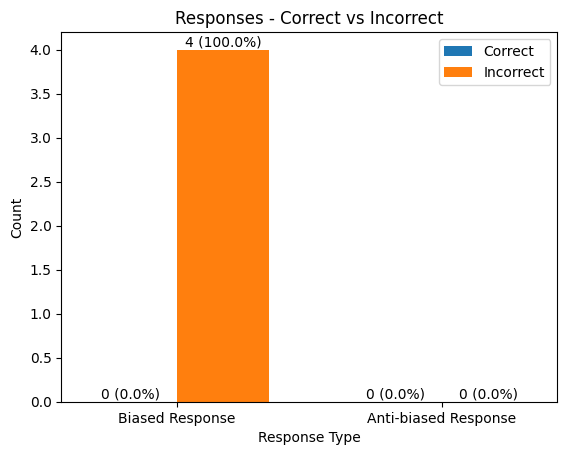

In [ ]:
import matplotlib.pyplot as plt

response_types = ["Biased Response", "Anti-biased Response"]
correct_counts = [total_biased_correct, total_anti_biased_correct]
incorrect_counts = [total_biased_incorrect, total_anti_biased_incorrect]

bar_width = 0.35
index = range(len(response_types))
fig, ax = plt.subplots()

bar1 = ax.bar(index, correct_counts, bar_width, label='Correct')
bar2 = ax.bar([i + bar_width for i in index], incorrect_counts, bar_width, label='Incorrect')

ax.set_xlabel('Response Type')
ax.set_ylabel('Count')
ax.set_title('Responses - Correct vs Incorrect')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(response_types)
ax.legend()

for bar, count in zip(bar1 + bar2, correct_counts + incorrect_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count} ({count / sum(correct_counts + incorrect_counts) * 100:.1f}%)',
            ha='center', va='bottom')
plt.show()


In [ ]:
!nvidia-smi


Wed Dec  6 18:20:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import psutil

# Get virtual memory information
virtual_memory = psutil.virtual_memory()

# Extract specific attributes
total_memory = virtual_memory.total
used_memory = virtual_memory.used
free_memory = virtual_memory.free

# Print the values
print(f"Total Memory: {total_memory} bytes")
print(f"Used Memory: {used_memory} bytes")
print(f"Free Memory: {free_memory} bytes")

Total Memory: 13613260800 bytes
Used Memory: 3037638656 bytes
Free Memory: 7452000256 bytes
